In [173]:
from vega_datasets import data
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [61]:
df = data.sf_temps()

In [62]:
df.tail()

,temp,date
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00
8758,48.3,2010-12-31 23:00:00


In [56]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')

In [67]:
df_index = df.set_index('date')

In [58]:
df.date.dtype

dtype('<M8[ns]')

### Call the sf_temps() dataset from the vega_datasets library like so:
1. Resample by the day and take the average temperature. Visualize the average temperature over time.

<Axes: xlabel='date'>

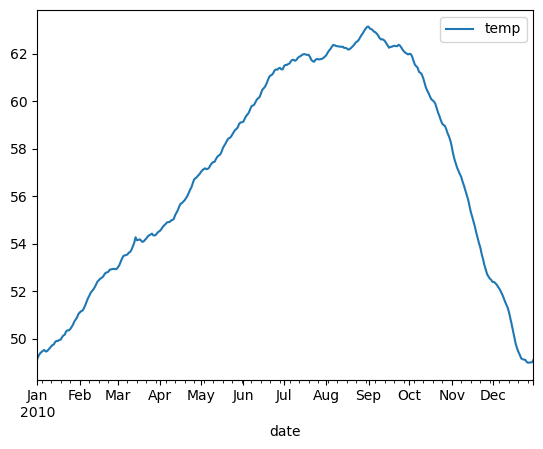

In [70]:
df_index.resample('D').mean().plot()

### 2. Write the code necessary to visualize the minimum temperature over time.

<Axes: xlabel='temp'>

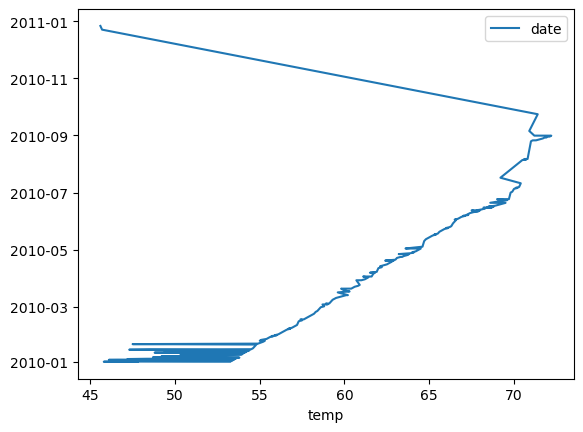

In [71]:
df.groupby('temp').min().sort_values(by='date').plot()

### 3. Write the code necessary to visualize the maximum temperature over time.

<Axes: xlabel='temp'>

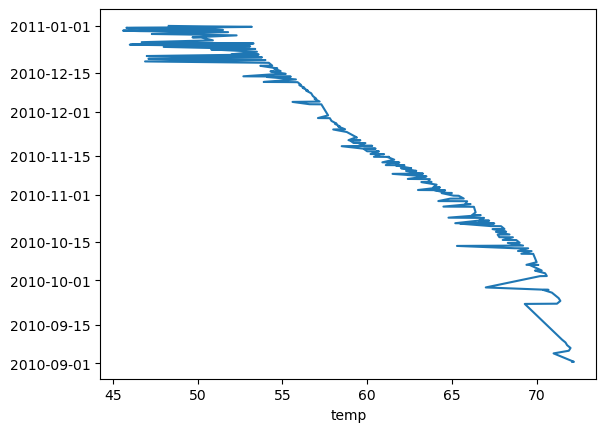

In [63]:
df.groupby('temp').max().sort_values(by='date').date.plot()

### 4. Which month is the coldest, on average?
    - January

### 5. Which month has the highest average temperature?
    - September

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
    - August

<Axes: xlabel='date'>

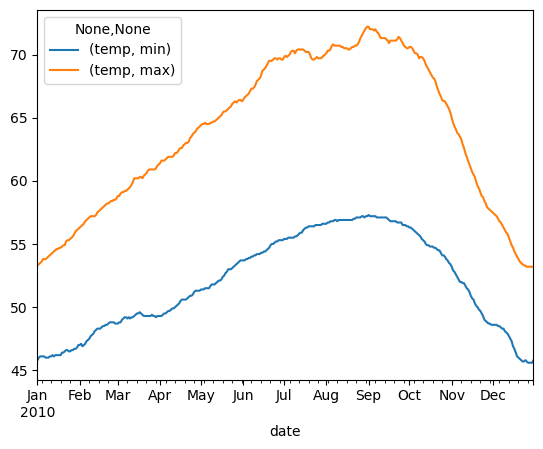

In [72]:
df_index.resample('D').agg(['min','max']).plot()

### 7. *Bonus:* Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<Axes: xlabel='date'>

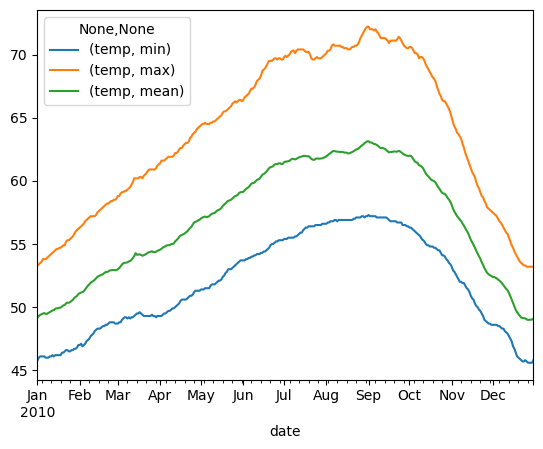

In [73]:
df_index.resample('D').agg(['min','max','mean']).plot()

<code>data.seattle_weather()</code>
### Use the above dataset for the following exercises:

In [74]:
df = data.seattle_weather()

In [77]:
df.shape

(1461, 6)

In [79]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [75]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [76]:
df_index = df.set_index('date')

### 1. Which year and month combination has the highest amount of precipitation?
    - 2015-03

In [84]:
df_index.groupby('precipitation').resample('M').max()

precipitation  temp_max  temp_min  wind weather
precipitation date                                                       
0.0           2012-01-31            0.0      12.8       5.0   5.1     sun
              2012-02-29            0.0      16.1       5.0   6.4     sun
              2012-03-31            0.0      15.6       6.7   7.0     sun
              2012-04-30            0.0      23.3       8.9   4.3     sun
              2012-05-31            0.0      26.7      12.8   4.3     sun
...                                 ...       ...       ...   ...     ...
54.1          2015-09-30            NaN       NaN       NaN   NaN     NaN
              2015-10-31            NaN       NaN       NaN   NaN     NaN
              2015-11-30            NaN       NaN       NaN   NaN     NaN
              2015-12-31           54.1      15.6      10.0   6.2     fog
55.9          2015-03-31           55.9      10.6       6.1   4.2     fog

[2543 rows x 5 columns]

### 2. Visualize the amount of monthly precipitation over time.

<Axes: xlabel='date'>

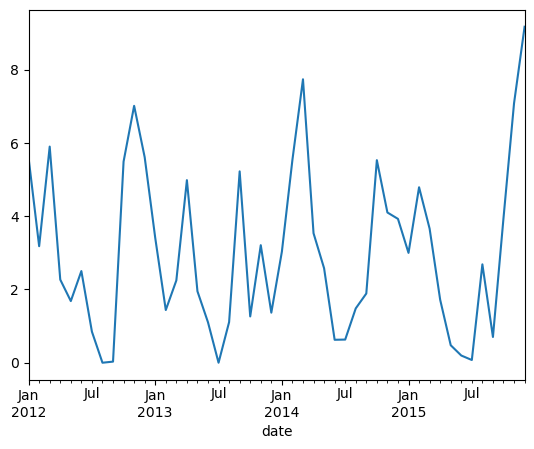

In [93]:
df_index.precipitation.resample('M').mean().plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<Axes: xlabel='date'>

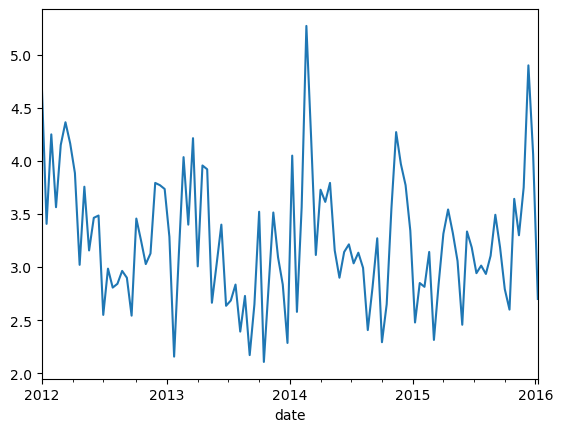

In [98]:
df_index.wind.resample('2W').mean().plot()

### 4. Which year-month combination is the windiest?
    - 2012-12

In [123]:
df_index.groupby('wind').resample('M').max().tail()

precipitation  temp_max  temp_min  wind weather
wind date                                                       
8.1  2014-01-31            1.5      11.1       5.6   8.1     fog
8.2  2012-01-31            3.0       8.3       3.3   8.2    rain
8.8  2013-12-31            3.0      13.3       7.8   8.8     fog
     2014-01-31           21.3      14.4       7.2   8.8     fog
9.5  2012-12-31            2.0       8.3       1.7   9.5    rain

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
    - 2014

In [106]:
sun_df = df_index[df_index.weather == 'sun']

In [110]:
sun_df.resample('Y').count()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,118,118,118,118,118
2013-12-31,205,205,205,205,205
2014-12-31,211,211,211,211,211
2015-12-31,180,180,180,180,180


### 6. In which month does it rain the most?
    - 2012-11

In [111]:
rain_df = df_index[df_index.weather =='rain']

In [118]:
rain_df.resample('M').count().sort_values('precipitation').tail()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-04-30,19,19,19,19,19
2012-03-31,19,19,19,19,19
2012-12-31,23,23,23,23,23
2013-02-28,23,23,23,23,23
2012-11-30,25,25,25,25,25


### 7. Which month has the most number of days with a non-zero amount of precipitation?
    - 2012-12

In [209]:
rain_df[rain_df.precipitation != 0].resample('M').count().sort_values('temp_max').tail()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-02-29,16,16,16,16,16
2012-03-31,17,17,17,17,17
2013-02-28,18,18,18,18,18
2012-11-30,20,20,20,20,20
2012-12-31,22,22,22,22,22


,precipitation,temp_max,temp_min,wind,weather
date,,,,,
1,38.4,13.9,7.2,8.2,rain
2,17.3,15.6,7.8,8.1,rain
3,27.4,18.3,11.1,7.6,rain
4,10.9,23.3,10.0,8.0,rain
5,18.5,22.2,12.2,6.4,rain
6,16.5,23.3,15.0,4.7,rain
7,15.2,29.4,15.0,6.0,rain
8,30.5,35.6,17.8,5.2,rain
9,0.3,25.0,13.9,5.0,rain


<code>data.flights_20k()</code>

### Use the above dataset for the following exercises:

In [183]:
df = data.flights_20k()

In [203]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,0,1489,SEA,MCI
2001-02-07 11:37:00,0,1848,MCO,PHX


In [186]:
df = df.set_index('date')

### 1. Convert any negative delays to 0.

In [187]:
df.loc[df.delay < 0, 'delay'] = 0

### 2. Which hour of the day has the highest average delay?
    - 20

In [221]:
hour_grouped = df.groupby([df.index.hour]).sum()

In [194]:
hour_grouped.sort_values('delay').tail()

,delay,distance,origin,destination
date,,,,
18,18375,654110,LBBDALOAKSEABWISDFOAKPHXLASSEATPASEAMCOMSYOAKP...,DALLBBBURSLCISPSTLBURLASOAKOAKMSYSLCFLLHOUPDXS...
17,18849,729967,SJCTULINDBNAAUSPHXCLEFLLAUSONTLAXSANFLLBUFPBID...,LAXMCIMDWBWIDALSANMDWTPADALPHXSATSMFJAXBWITPAH...
19,19833,612333,BWISMFHOUDALRNORNOOAKOKCLASHOUOAKAUSPHXBNAPHXM...,PHXBURMDWHOUPDXPDXRNOMCIRNOSATLAXMCOLAXBHMELPM...
21,19875,365575,MSYSTLMCIPHXMSYONTSMFDALCLETPAJAXBWIOKCSMFPHXB...,MCOINDLASLASMCOLASLAXSATBWIMSYFLLTPASTLONTSTLI...
20,20126,507373,DTWLASBNALAXLASRDUJAXHOUMSYBNAMDWOAKTULBWILAXT...,MDWSLCMCOOAKBURTPATPADALHOUMHTINDLAXHOUMHTSJCP...


### 3. Does the day of the week make a difference in the delay amount?
    - Yes, Thursday has by far the most delays

In [197]:
day_grouped = df.groupby([df.index.day_of_week]).sum()

In [199]:
day_grouped.sort_values('delay')

,delay,distance,origin,destination
date,,,,
5,19755,1290733,SANBNAMCOSANLAXSDFPHXSTLMDWMCIDALLASSANMDWFLLL...,SJCBWIBWISJCOAKSTLLAXOKCBWITULHOUBHMSMFJANTPAR...
0,21354,1504996,ABQBWIPHXHOUHOUAUSTULDALINDBHMPHXSMFCRPBHMSJCB...,SANBDLBURTULTULDALSTLHOUSTLHOUOMASANHOUHOULASM...
6,27221,1327880,LBBTULINDBNALASSATBNADALTPABURPHXTULSLCOAKLAXL...,DALMCIMDWLAXSMFPHXBWISATMSYLASONTDALRNOPDXOAKB...
1,27715,1460784,SMFMDWAUSPHXPHXBNASEAMSYBWISATOAKLAXMDWPHXSTLT...,BURBNALASRNOONTBWISLCDALISPDALLAXTUSMCILASSDFS...
2,33969,1542607,FLLMSYMCIBWIMCIISPPHXSJCSANHOUOAKSMFJAXSTLSLCS...,ISPMCOMDWPHXLASTPALASLAXSFODALBURLAXFLLPHXMCIM...
3,38605,1460862,MDWDALBNAMSYDTWRNOPHXMDWOAKBUFLASLBBDALRNOABQA...,CLETULAUSMCOMDWSEASANBWIBURBWIRNOAUSSATPDXLASD...
4,53770,1517386,STLBWIDALABQMSYONTONTOKCCMHHOURDUSTLPHXGEGCLEL...,INDALBLBBMCOBNALASLASHOUBNAMDWBNADTWONTSLCBWIS...


### 4. Does the month make a difference in the delay amount?
    - Not between these months, but March has less than Feb and Jan

In [202]:
month_grouped = df.groupby([df.index.month]).sum()

In [201]:
month_grouped.sort_values('delay')

,delay,distance,origin,destination
date,,,,
3,68732,3512796,STLMCIBWIMDWISPPHXDALHOUAUSPHXHOUBNAMSYMSYBNAO...,INDMDWPHXCLETPALASLBBDALLASRNOTULAUSMCOBNABWIB...
1,76670,3394659,SANFLLMSYABQSMFBNAMDWSANDALHOUPHXONTBNAONTSEAL...,SJCISPMCOSANBURBWIBNASFOTULTULONTLASLAXLASSLCS...
2,76987,3197793,LBBMCIBWISJCBWITULPHXABQINDDTWJAXRNOOKCHOUPHXM...,DALLASALBLAXBDLMCIBURMCOMDWMDWFLLSEAHOUMDWSANB...


In [207]:
df.index.month.unique()

Index([1, 2, 3], dtype='int32', name='date')